# Now let's go on to the third dimmension

### The time-independent Schrödinger equation is:
$$
\left( -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{r}) \right) \psi(\mathbf{r}) = E \psi(\mathbf{r})
$$
### Third Dimmension
$$
\left( -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{x,y,z}) \right) \psi(\mathbf{x,y,z}) = E \psi(\mathbf{x,y,z})
$$
$$
\psi(\mathbf{x,y,z}) =  X(\mathbf{x}) Y(\mathbf{y}) Z(\mathbf{z})
$$
$$
\left( -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{x,y,z}) \right) X(\mathbf{x}) Y(\mathbf{y}) Z(\mathbf{z}) = E X(\mathbf{x}) Y(\mathbf{y}) Z(\mathbf{z})
$$

$$
\left( -\frac{\hbar^2}{2m} \nabla^2\right) X(\mathbf{x}) Y(\mathbf{y}) Z(\mathbf{z}) = E X(\mathbf{x}) Y(\mathbf{y}) Z(\mathbf{z})
$$

$$
X(\mathbf{x}) = e^{a x i}
$$
$$
Y(\mathbf{y}) = e^{b y i}
$$
$$
Z(\mathbf{z}) = e^{c y i}
$$
$$
-\dfrac{\hbar^2}{2m} \left (\dfrac{\partial^2 \psi(x,y,z)}{\partial x^2} + \dfrac{\partial ^2 \psi(x,y,z)}{\partial y^2} + \dfrac{\partial ^2 \psi(x,y,z)}{\partial z^2}\right) = E \psi(x,y,z)
$$

$$
-\dfrac{\hbar^2}{2m} \left (\dfrac{\partial^2 e^{a x i+b y i+c z i}}{\partial x^2} + \dfrac{\partial ^2 e^{a x i+b y i+c z i}}{\partial y^2} + \dfrac{\partial ^2 e^{a x i+b y i+c z i}}{\partial y^2} \right) = E e^{a x i+b y i+c z i}
$$

$$
\frac{\hbar^2}{2m} (a^2 e^{a x i+b y i+c z i} + b^2 e^{a x i+b y i+c z i}) + c^2 e^{a x i+b y i+c z i})  = E e^{a x i+b y i+c z i}
$$

$$
\frac{\hbar^2}{2m} (a^2 + b^2+c^2) e^{a x i+b y i+c z i} = E e^{a x i+b y i+c z i}
$$

$$
\frac{\hbar^2}{2m} (a^2 + b^2+c^2) = E 
$$

In [3]:
import time
import numpy as np
from scipy.constants import hbar,electron_mass 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from numpy.linalg import eig,inv,solve
inveig = lambda Es,Evects: Evects@(np.diag(Es))@inv(Evects)
π = np.pi
ħ = hbar
me = electron_mass

def gaussian3D(X,Y,Z, μ, σ):
    return (1.0 / (np.sqrt(2.0 * np.pi) * σ) 
        * np.exp(-np.power((X - μ[0]) / σ, 2.0) / 2)
        * np.exp(-np.power((Y - μ[1]) / σ, 2.0) / 2) 
        * np.exp(-np.power((Z - μ[2]) / σ, 2.0) / 2))

In [15]:
%%time
Δp = 0.1
x = np.arange(0,1,Δp)
y = np.arange(0,1,Δp)
z = np.arange(0,1,Δp)
X,Y,Z = np.meshgrid(x, y,z)

μ = np.array([0.5,0.5,0.5])
f = np.sqrt(gaussian3D(X,Y,Z,μ,0.1)/2) + 1j*np.sqrt(gaussian3D(X,Y,Z,μ,0.1)/2)

freqs = np.fft.fftfreq(len(f), Δp)
freqsX,freqsY,freqsZ = np.meshgrid(freqs, freqs,freqs)

a = (2*π*freqsX).flatten()
b = (2*π*freqsY).flatten()
c = (2*π*freqsZ).flatten()
#Solve for the eigenVectors and EigenValues for the case of a free particle
Evects = np.array([(np.exp(1j*ai*X)*np.exp(1j*bi*Y)*np.exp(1j*ci*Z)).flatten() for ai,bi,ci in zip(a,b,c)])
Es = (a**2+b**2+c**2).flatten()#*(ħ**2) / (2 * me)
np.fft.fftfreq(10, 0.12)

CPU times: total: 156 ms
Wall time: 159 ms


array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
       -4.16666667, -3.33333333, -2.5       , -1.66666667, -0.83333333])

In [67]:
%%time
#Using the eigenVectors and EigenValues solve for the corresponding matrix
Mat = np.real(np.round(inveig(Es,Evects)))
print(Mat)

[[1007. -207.   57. ...   -0.   -0.    0.]
 [-207. 1007. -207. ...   -0.   -0.   -0.]
 [  57. -207. 1007. ...   -0.   -0.   -0.]
 ...
 [   0.    0.   -0. ... 1007. -207.   57.]
 [   0.    0.   -0. ... -207. 1007. -207.]
 [  -0.   -0.    0. ...   57. -207. 1007.]]
CPU times: total: 1.84 s
Wall time: 245 ms


In [59]:
%%time
#Equation decribing the potenials of the desired system
V = ((np.cos(2*π*X+π)*np.cos(2*π*Y+π)*np.cos(2*π*X)+1)).flatten()
mV = 1e-36
#Add the potenials to the Matrix of the free particle to get the matrix of the system
Es1,Evects1 = eig(Mat+np.diag(V)*mV)#


CPU times: total: 14min 14s
Wall time: 3min 5s


In [37]:
%%time
#Solve for the magnitudes of EigenVectors of the system from the desired initial positions
As=solve(Evects1, f.flatten())
# data = []
# for t in np.arange(0,2000,100):
#     arr = np.abs(Evects1@(As*np.exp(-1j*t*Es1/ħ)))**2
#     data.append(np.reshape(arr, np.shape(X)))

CPU times: total: 2.28 s
Wall time: 302 ms


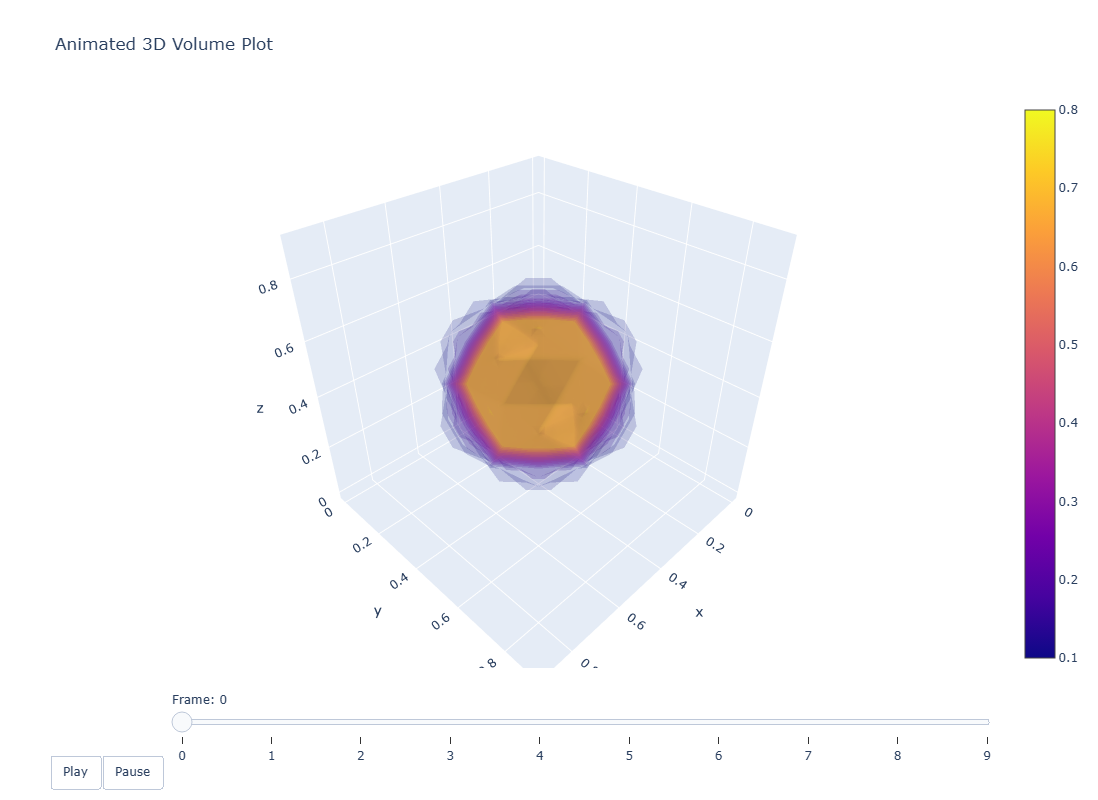

In [21]:
import numpy as np
import plotly.graph_objects as go

# # Grid size
# n = 30
# x, y, z = np.linspace(-1, 1, n), np.linspace(-1, 1, n), np.linspace(-1, 1, n)
# X, Y, Z = np.meshgrid(x, y, z)

# # Create initial 3D scalar field: a time-dependent Gaussian
# def generate_volume(t):
#     return np.sin(np.pi*X) * np.cos(np.pi*Z) * np.sin(np.pi*Y + t)

# Initial data
values = data[0]

# Create frames for animation
frames = []
for i,d in enumerate(data):
    t = i / 2
    values = data[i]
    frame = go.Frame(data=[
        go.Volume(
            x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
            value=values.flatten(),
            isomin=0.1,
            isomax=0.8,
            opacity=0.1,  # lower opacity to see internal structure
            surface_count=15,
        )
    ], name=str(i))
    frames.append(frame)

# Create the initial plot
fig = go.Figure(
    data=[
        go.Volume(
            x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
            value=values.flatten(),
            isomin=0.1,
            isomax=0.8,
            opacity=0.1,
            surface_count=15,
        )
    ],
    layout=go.Layout(
        title="Animated 3D Volume Plot",
        width=800,     
        height=800, 
        scene=dict(aspectmode='cube'),
        updatemenus=[{
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 200, "redraw": True}, "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=[{
            "steps": [
                {
                    "args": [[str(i)], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate"}],
                    "label": f"{i}",
                    "method": "animate"
                } for i in range(len(frames))
            ],
            "transition": {"duration": 0},
            "x": 0.1,
            "y": 0,
            "currentvalue": {"prefix": "Frame: "},
            "len": 0.9
        }]
    ),
    frames=frames
)

fig.show()
